## Orbital motion in Cartesian Cordinates

We can start with the kinetic and potential energies of two masses being affected by gravity:

$\begin{align}
   T = \frac{1}{2}m_1(\dot x_1^2 + \dot y_1^2) + \frac{1}{2}m_2(\dot x_2^2 + \dot y_2^2)
\end{align}$

$\begin{align}
   U = -\frac{Gm_1m_2}{\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}}
\end{align}$

The Lagrangian is then:

$\begin{align}
   L = \frac{1}{2}m_1(\dot x_1^2 + \dot y_1^2) + \frac{1}{2}m_2(\dot x_2^2 + \dot y_2^2)+\frac{Gm_1m_2}{\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}}
\end{align}$

Using the general form of the Lagrange equation gives one equation for each variable for $x_1$, $x_2$, $y_1$, and $y_2$:

$\begin{align}
   \frac{\partial L}{\partial q_i} = \frac{d}{dt}\frac{\partial L}{\partial \dot q_i}
\end{align}$

$\begin{align}
   m_1\ddot x_1 = \frac{-Gm_1m_2(x_1-x_2)}{[(x_1-x_2)^2 + (y_1-y_2)^2]^{3/2}} \\
   m_2\ddot x_2 = \frac{Gm_1m_2(x_1-x_2)}{[(x_1-x_2)^2 + (y_1-y_2)^2]^{3/2}} \\
   m_1\ddot y_1 = \frac{-Gm_1m_2(y_1-y_2)}{[(x_1-x_2)^2 + (y_1-y_2)^2]^{3/2}} \\
   m_2\ddot y_2 = \frac{Gm_1m_2(y_1-y_2)}{[(x_1-x_2)^2 + (y_1-y_2)^2]^{3/2}}
\end{align}$

In [261]:
%matplotlib inline

In [262]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

In [263]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [264]:
class Orbit():
    """
    Implements the parameters and Langrange's equations for two 
    masses under gravitational force.
     

    Methods
    -------
    dz_dt(t, z)
        Returns the right side of the differential equation in vector z, 
        given time t and the corresponding value of z.
    """
    def __init__(self, m1=100., m2=1., g=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.g = g
            
    def dz_dt(self, t, z):
        """
        This function returns the right-hand sides of the Lagrange equations
        
        Parameters
        ----------
        t : float
            time 
        z : float
            An 8-component vector with z[0]=x1 ; z[1]=x1dot ; z[2]=x2 ; z[3]=x2dot ; z[4]=y1 ; z[5]=y1dot ; z[6]=y2 ; z[7]=y2dot
            
        Returns
        -------
        
        """
        return [z[1], 
                (-g*m2*(z[0]-z[2]) ) / ( (z[0]-z[2])**2. + (z[4]-z[6])**2. )**(3./2.),
                z[3],
                ( g*m1*(z[0]-z[2]) ) / ( (z[0]-z[2])**2. + (z[4]-z[6])**2. )**(3./2.),
                z[5],
                (-g*m2*(z[4]-z[6]) ) / ( (z[0]-z[2])**2. + (z[4]-z[6])**2. )**(3./2.),
                z[7],
                ( g*m1*(z[4]-z[6]) ) / ( (z[0]-z[2])**2. + (z[4]-z[6])**2. )**(3./2.)
                ]
                       
    
    def solve_ode(self, t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0, 
                  method='RK23',
                  abserr=1.0e-12, relerr=1.0e-12):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0]  
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot  = solution.y

        return x1, x2, y1, y2

In [265]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [266]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [267]:
# Labels for individual plot axes
x_vs_y_labels = (r'$x$', r'$y$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 25.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

g = 1.
m1 = 1.
m2 = 1.


# Instantiate a pendulum 
orbit1 = Orbit(g=g, m1=m1, m2=m2)


In [268]:
#initial conditions

x1_0 = 1.
x1_dot_0 = 0.0
x2_0 = -(m1/m2)*x1_0
x2_dot_0 = -(m1/m2)*y1_0
y1_0 = 0.0
y1_dot_0 = .25
y2_0 = -(m1/m2)*y1_0
y2_dot_0 = -(m1/m2)*y1_dot_0

#solve equations
x1, x2, y1, y2 = orbit1.solve_ode(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)


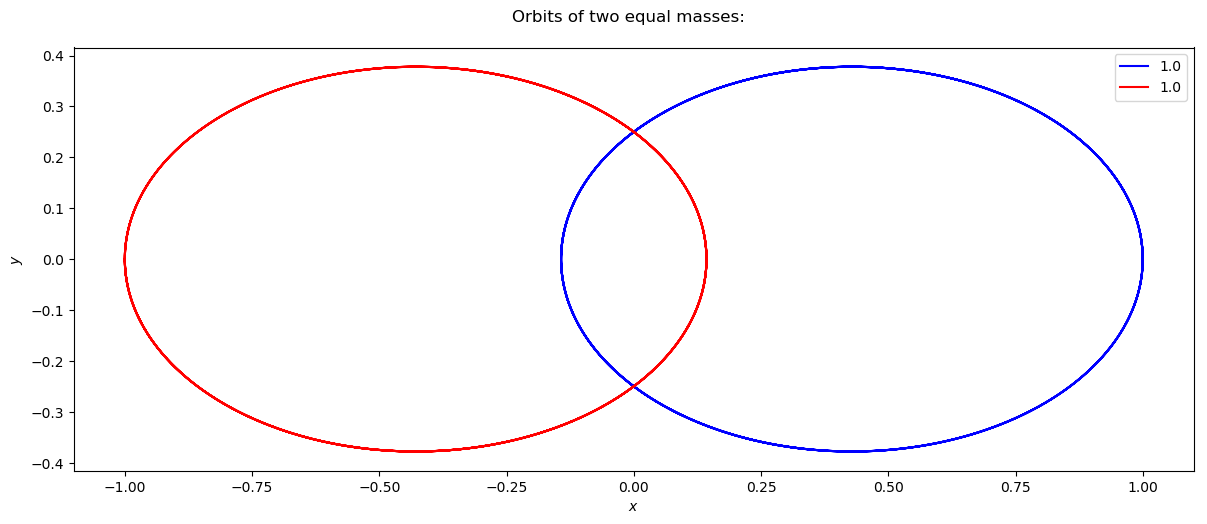

In [269]:
fig = plt.figure(figsize=(15,5))
overall_title = 'Orbits of two equal masses:  ' + \
               '\n'    #  \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    

plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label=m1, 
            title=r'', 
            ax=ax_a)    
                         
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='red',
            label=m2, 
            title=r'', 
            ax=ax_a)    
ax_a.set_aspect(1)

fig.tight_layout()

Above are the orbits for two bodies of equal mass. Their orbits look symmetrical as expected, and they orbit the center of mass of the system.

In [280]:
#now set up the system for a large mass and a small mass

g = 1.
m1 = 1.
m2 = 20.


# Instantiate a pendulum 
orbit1 = Orbit(g=g, m1=m1, m2=m2)

#initial conditions

x1_0 = 1.
x1_dot_0 = 0.0
x2_0 = -(m1/m2)*x1_0
x2_dot_0 = -(m1/m2)*y1_0
y1_0 = 0.0
y1_dot_0 = 1.
y2_0 = -(m1/m2)*y1_0
y2_dot_0 = -(m1/m2)*y1_dot_0

#solve equations
x1, x2, y1, y2 = orbit1.solve_ode(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)


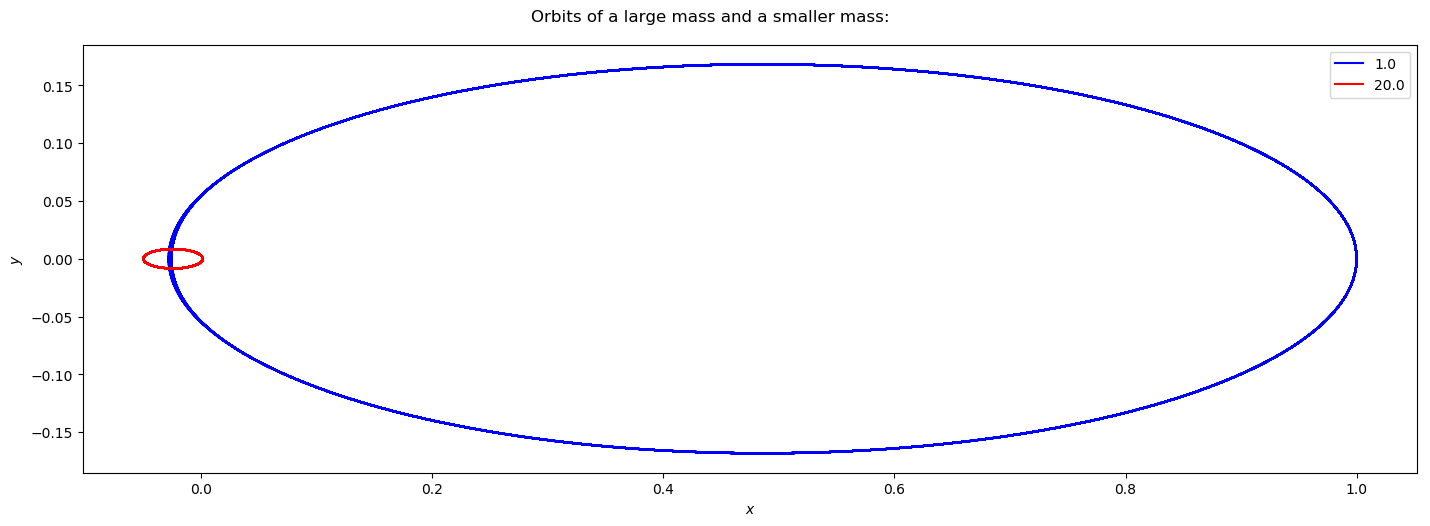

In [281]:
fig = plt.figure(figsize=(15,5))
overall_title = 'Orbits of a large mass and a smaller mass:  ' + \
               '\n'    #  \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    

plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label= m1, 
            title=r'', 
            ax=ax_a)    
                         
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='red',
            label= m2, 
            title=r'', 
            ax=ax_a)    
ax_a.set_aspect(1)
ax_a.legend()

fig.tight_layout()

Above are orbits for a large mass and a smaller mass. The larger body has a much smaller semimajor axis as we would expect, because the center of mass of the system is much closer to it. I have avoided choosing too large of a mass difference to cut down on processing time, although the parameters could be altered further. I found that my machine took much longer to solve the equations for a large mass ratio, I am not sure why this parameter has such a large effect on the computer's processing time, compared to other parameters like $\Delta t$.